In [1]:
from os import getenv

from dotenv import load_dotenv

load_dotenv()
AUDIO = getenv("AUDIO_DIRECTORY")

In [2]:
from numpy import linspace
from scipy.io.wavfile import read

rate, data = read(f"{AUDIO}/AR_A_fret_0-20.wav")
length = data.shape[0] / rate
time = linspace(0, length, data.shape[0])

<ipython-input-2-82ba76bea059>:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = read(f"{AUDIO}/AR_A_fret_0-20.wav")


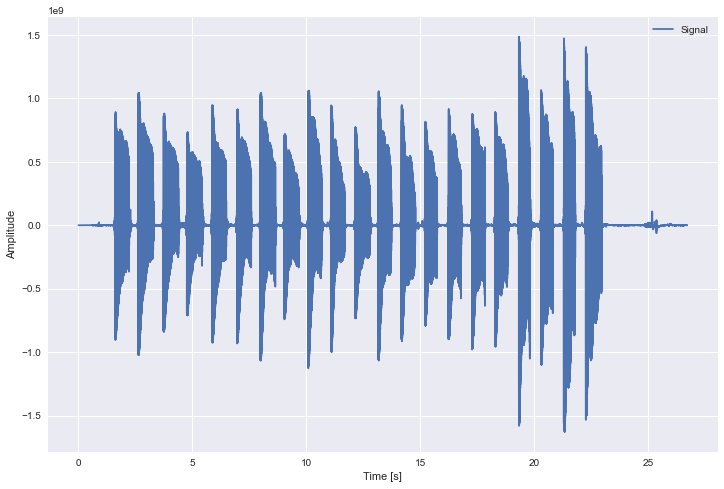

In [3]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(time, data[:], label="Signal")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()